In [100]:
user='Username'
pwd = 'Password'

In [76]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select
import time
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests as req

driver=webdriver.Chrome(executable_path='/usr/bin/chromedriver')
wait=WebDriverWait(driver,20)
driver.maximize_window()

/home/ankit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  from ipykernel import kernelapp as app


In [10]:
# Functions
def loginToInsta(userName,password):
    try:
        driver.get('https://www.instagram.com/accounts/login/')
        uname=wait.until(EC.presence_of_element_located((By.NAME,'username'))).send_keys(userName)
        pwdBtn=wait.until(EC.presence_of_element_located((By.NAME,'password'))).send_keys(password)
        sbBtn=wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'button[type="submit"]'))).submit()
    except TimeoutException:
        print("Something went wrong")
        return
    
def enter_in_searchbox(string):
    searchBtn=wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,'._ab8w._ab94._ab99._ab9f._ab9m._ab9p._abcj._abcm')))
    searchBtn[1].click()
    search_box=wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'input[placeholder]')))
    search_box.send_keys(string)

def go_to_end_of_results():
    currentHeight=driver.execute_script('return document.getElementsByClassName("xocp1fn")[0].scrollHeight;')
    while True:
        driver.execute_script('document.getElementsByClassName("xocp1fn")[0].scrollTo(0,arguments[0])',currentHeight)
        time.sleep(3)
        newHeight=driver.execute_script('return document.getElementsByClassName("xocp1fn")[0].scrollHeight;')

        if newHeight==currentHeight:
            break
        currentHeight=newHeight

def getHandlesForQuery(query):
    enter_in_searchbox(query)
    time.sleep(2)
    handles=[]
    go_to_end_of_results()
    
    data=wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,'._aacl._aaco._aacw._aacx._aad6')))
    for i in data:
        if i.text=='' or i.text[0]=='#':
            continue       
        handles.append(i.text)
    return handles

In [77]:
loginToInsta(user,pwd)

# Problem 1

## your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

### 1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [11]:
handles=getHandlesForQuery('food')

In [12]:
print(len(handles))

51


In [13]:
base='https://www.instagram.com/'

In [37]:
handleUrls={}
for i in handles:
#     print(len(i.split()))
    if len(i.split())>1:
        continue
    url=base+i
    handleUrls[i]=base+i
    print(url)

https://www.instagram.com/foodtalkindia
https://www.instagram.com/dilsefoodie
https://www.instagram.com/delhi_streets_food
https://www.instagram.com/tasty.foodrecipes
https://www.instagram.com/foodiee_says
https://www.instagram.com/foodish_fun
https://www.instagram.com/food
https://www.instagram.com/fun2ooshfood
https://www.instagram.com/dharti.ka.bhoj
https://www.instagram.com/delhigastronauts
https://www.instagram.com/thelosthungrykid
https://www.instagram.com/delhifoodgrammer
https://www.instagram.com/food.insania
https://www.instagram.com/food_architect_
https://www.instagram.com/food_mad101
https://www.instagram.com/sugarcoatedsins_
https://www.instagram.com/delhi_food_shaukeen
https://www.instagram.com/food_introdictionary
https://www.instagram.com/chamber_of_food
https://www.instagram.com/food_mood_photography
https://www.instagram.com/dillifoodexpress
https://www.instagram.com/food.bhakts
https://www.instagram.com/food_gambler
https://www.instagram.com/food_flooooodddd
https://

In [60]:
def Count_Followers(user_Handle_link):
    driver.get(user_Handle_link)
    time.sleep(2)
    try:
        data = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,'._ac2a')))[1]
    except:
        print(user_Handle_link)
    Follower_count = BeautifulSoup(data.get_attribute('outerHTML'),'html.parser').span['title']
    Follower_count=int(Follower_count.replace(',',''))
    return Follower_count

In [67]:
Followers_of_user = {}
for user_Id,Link in handleUrls.items():
    follower = Count_Followers(Link)
    Followers_of_user[user_Id]=follower

In [68]:
Top_5_handle=[]
Top_5_followed_user={}
for i in sorted(Followers_of_user.items(), key=lambda kv: kv[1],reverse=True)[:5]:
    print(i[0],'--->',i[1],'Followers')
    Top_5_followed_user[i[0]]=i[1]
    Top_5_handle.append(i[0])

dilsefoodie ---> 1052375 Followers
foodtalkindia ---> 308960 Followers
food ---> 182689 Followers
Food ---> 182688 Followers
foodiesafarii ---> 129000 Followers


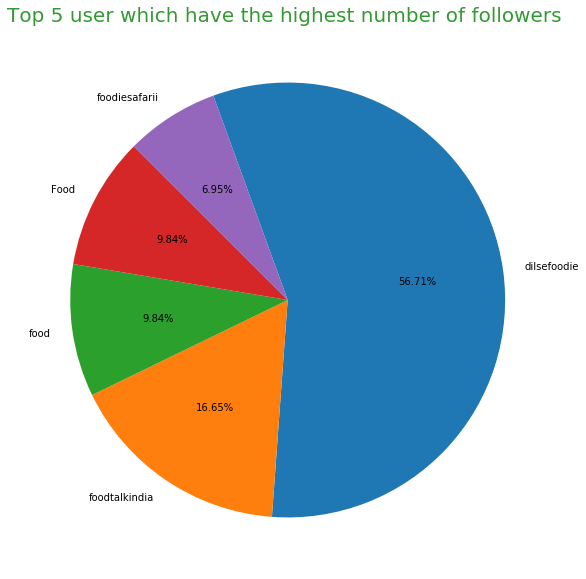

In [69]:
count = list(Top_5_followed_user.values())
userId = list(Top_5_followed_user.keys())

plt.figure(figsize=(10,10))
plt.pie(count,labels=userId,autopct="%.2f%%",counterclock=False,startangle=110)
plt.title('Top 5 user which have the highest number of followers ',fontsize=20, color='green',alpha=0.8)
plt.show()

## 2. Now Find the number of posts these handles have done in the previous 3 days.

In [71]:
print(Top_5_handle)

['dilsefoodie', 'foodtalkindia', 'food', 'Food', 'foodiesafarii']


In [83]:
from datetime import datetime, timedelta
def Number_of_Post(user_url,No_of_Days):
        
    driver.get(user_url)
    time.sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_ac7v _aang"]/div[1]')))
    First_Post.click()
    no_of_post=0
    while True:

        time_of_post = wait.until(EC.presence_of_element_located((By.XPATH,'//time[@class="_aaqe"]'))).get_attribute('datetime')
        date_of_post = datetime.strptime(time_of_post[0:19], "%Y-%m-%dT%H:%M:%S")
        if (datetime.now() - date_of_post).days > No_of_Days :
            break
        else :
            no_of_post += 1

        Next_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]/button')))
        Next_post.click()
        time.sleep(2)

    driver.back()
    return no_of_post

In [86]:
no_of_post_per_user = {}
for Id in Top_5_handle:
    user_url = handleUrls[Id]
    Post_count = Number_of_Post(user_url,3)
    no_of_post_per_user[Id] = Post_count
    
# print the user id and number of post have done by user in 3 days
for ID,Count in no_of_post_per_user.items():
    print(ID,'----->',Count,'Posts')

dilsefoodie -----> 3 Posts
foodtalkindia -----> 4 Posts
food -----> 2 Posts
Food -----> 2 Posts
foodiesafarii -----> 0 Posts


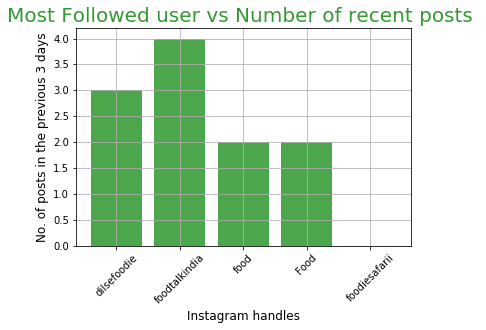

In [87]:
x = no_of_post_per_user.keys()
y = no_of_post_per_user.values()

plt.bar(x,y,color='g',alpha=0.7)
plt.ylabel("No. of posts in the previous 3 days",size=12)
plt.xlabel("Instagram handles",size=12)
plt.xticks(rotation = 45)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()



# Problem 2 :

## Your friend also needs a list of hashtags that he should use in his posts.

### 1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [88]:
def content_of_post(user_url,No_of_post):
        
    Text_list = []
    driver.get(user_url)
    time.sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_ac7v _aang"]/div[1]')))
    First_Post.click()
    no_of_post=0
    while True:

        HTML = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_a9zs')))
        Texts = BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('a')
        
        # get the text
        for text in Texts:
            text=text.text
            if text[0]!='@':
                Text_list.append(text)
        no_of_post += 1
        if No_of_post==no_of_post:
            break

        Next_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]/button')))
        Next_post.click()
        time.sleep(2)

    driver.back()
    return Text_list

# extract all the list of text of top 5 user which I get in previous qes and store them in list for further requirments
words_of_5_user = []
for Id in Top_5_handle:
    user_url = handleUrls[Id]
    text_list = content_of_post(user_url,10)
    words_of_5_user.extend(text_list)
    print(Id,'--->',text_list)
    print()

dilsefoodie ---> ['#dilsefoodie', '#dilsecouple', '#ambala', '#dilsefoodie', '#dilsebaby', '#dilsecouple', '#dilsefoodie', '#dilsecouple', '#northindianfood', '#dilsefoodie', '#dilsecouple', '#paranthe', '#dilsefoodie', '#dilsecouple', '#tandoori', '#meat', '#dilsefoodie', '#dilsecouple', '#ambala', '#dilsefoodie', '#dilsefoodie', '#food', '#rasgulla', '#dilsefoodie', '#dilsecouple', '#candy', '#dilsefoodie', '#dilsecouple', '#amritsar', '#breakfast', '#dilsefoodie', '#food', '#sewa']

foodtalkindia ---> ['#homegrown', '#artisanal', '#chocolate', '#organic', '#fruitbased', '#foodtalkindia', '#food', '#foodies', '#foodgasm', '#foodiesofindia', '#foodblogger', '#delicious', '#yummy', '#instafood', '#discover', '#fifa', '#beer', '#sports', '#fifa2022', '#worldcup', '#instabeer', '#foodtball', '#foodtalkindia', '#food', '#foodies', '#foodgasm', '#foodiesofindia', '#foodblogger', '#delicious', '#yummy', '#instafood', '#discover', '#NewInTown', '#bandra', '#lalocamaria', '#spanish', '#medite

## 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [89]:
def get_word_frequency(List_of_words):
    dct = {}
    words_list = []
    for word in List_of_words:
        dct[word] = dct.get(word,0) + 1
    return dct

# calling the function
word_freq_dict = get_word_frequency(words_of_5_user)
word_freq_dict

{'#dilsefoodie': 11,
 '#dilsecouple': 8,
 '#ambala': 2,
 '#dilsebaby': 1,
 '#northindianfood': 1,
 '#paranthe': 1,
 '#tandoori': 1,
 '#meat': 1,
 '#food': 14,
 '#rasgulla': 1,
 '#candy': 1,
 '#amritsar': 1,
 '#breakfast': 1,
 '#sewa': 1,
 '#homegrown': 1,
 '#artisanal': 1,
 '#chocolate': 1,
 '#organic': 1,
 '#fruitbased': 1,
 '#foodtalkindia': 10,
 '#foodies': 10,
 '#foodgasm': 10,
 '#foodiesofindia': 10,
 '#foodblogger': 11,
 '#delicious': 10,
 '#yummy': 10,
 '#instafood': 10,
 '#discover': 10,
 '#fifa': 1,
 '#beer': 1,
 '#sports': 1,
 '#fifa2022': 1,
 '#worldcup': 1,
 '#instabeer': 1,
 '#foodtball': 1,
 '#NewInTown': 3,
 '#bandra': 1,
 '#lalocamaria': 1,
 '#spanish': 1,
 '#mediterranean': 1,
 '#cuisine': 1,
 '#mumbai': 2,
 '#foodtalk': 8,
 '#fti': 8,
 '#foodie': 12,
 '#foodgram': 8,
 '#foodfeed': 8,
 '#instagood': 8,
 '#instagram': 8,
 '#delhi': 3,
 '#karolbagh': 1,
 '#streetfood': 4,
 '#coffee': 1,
 '#caffeinne': 1,
 '#recipe': 2,
 '#winter': 1,
 '#season': 1,
 '#chilly': 1,
 '#gin'

## 3.Create a csv file with two columns : the word and its frequency

In [90]:
words = [ key for key,value in word_freq_dict.items()]
word_frequency = [ value for key,value in word_freq_dict.items()]

# Create a csv file with two columns : the word and its frequency
columns = {"Word":words,"Frequency":word_frequency}

# Create the pandas dataframe 
df = pd.DataFrame(columns)

#using .to_csv pandas function to convert dataframe to csv without Index values
df.to_csv('words_frequency.csv',index=False)

# Printing the Top 10 Row of the table
df.head(10)

,Word,Frequency
0,#dilsefoodie,11
1,#dilsecouple,8
2,#ambala,2
3,#dilsebaby,1
4,#northindianfood,1
5,#paranthe,1
6,#tandoori,1
7,#meat,1
8,#food,14
9,#rasgulla,1


## 4. Now, find the hashtags that were most popular among these bloggers

In [91]:
def sort_by_value(Dict):
    sorted_data = [[value,key] for key,value in Dict.items()]
    sorted_data.sort(reverse=True)
    return sorted_data

# Now, find the hashtags that were most popular among these bloggers
hastag_with_frequency = sort_by_value(word_freq_dict)

# top hashtags
for i in hastag_with_frequency:
    print(i[1],'-->',i[0],'Hashtags')

#food --> 14 Hashtags
#foodie --> 12 Hashtags
#foodblogger --> 11 Hashtags
#dilsefoodie --> 11 Hashtags
#yummy --> 10 Hashtags
#instafood --> 10 Hashtags
#foodtalkindia --> 10 Hashtags
#foodnews --> 10 Hashtags
#foodiesofindia --> 10 Hashtags
#foodies --> 10 Hashtags
#foodgasm --> 10 Hashtags
#discover --> 10 Hashtags
#delicious --> 10 Hashtags
#instagram --> 8 Hashtags
#instagood --> 8 Hashtags
#fti --> 8 Hashtags
#foodtalk --> 8 Hashtags
#foodgram --> 8 Hashtags
#foodfeed --> 8 Hashtags
#dilsecouple --> 8 Hashtags
#reelvideo --> 7 Hashtags
#instagramreels --> 6 Hashtags
#truffle --> 4 Hashtags
#streetfood --> 4 Hashtags
#foodvideos --> 4 Hashtags
#foodscene --> 4 Hashtags
#explore --> 4 Hashtags
#eeeats --> 4 Hashtags
#brunch --> 4 Hashtags
#travel --> 3 Hashtags
#foodreels --> 3 Hashtags
#delhistreetfood --> 3 Hashtags
#delhi --> 3 Hashtags
#NewInTown --> 3 Hashtags
#westchesterfoodie --> 2 Hashtags
#westchesterfood --> 2 Hashtags
#truff --> 2 Hashtags
#travelreels --> 2 Hashtags
#t

## 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

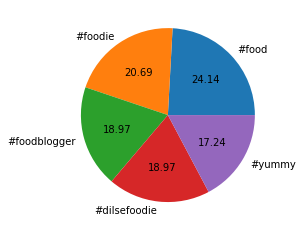

In [92]:
# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
top_five_hastags = [ i[1] for i in hastag_with_frequency[:5]]
hastag_counts = [ i[0] for i in hastag_with_frequency[:5]]

# Pie graph to get the idea of which hashtag has been used for most of the time.
plt.pie(hastag_counts,labels=top_five_hastags,autopct="%.2f")
plt.show()


## Probem 3 :

## You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:

## 1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [96]:
def Likes_of_post(user_url,No_of_post):
        
    Totel_Likes = 0
    driver.get(user_url)
    time.sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_ac7v _aang"]/div[1]')))
    First_Post.click()
    no_of_post=0
    while True:

        HTML = wait.until(EC.presence_of_element_located((By.XPATH,'//section[@class="_ae5m _ae5n _ae5o"]')))
        try:
            Likes = BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('span')[-1]
            Likes = int(Likes.text.replace(',',''))
        except:
            Likes=0
        Totel_Likes+=Likes
        no_of_post += 1
        if No_of_post==no_of_post:
            break
        try:
            Next_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]/button')))
            Next_post.click()
        except:
            break
        time.sleep(2)

    driver.back()
    return Totel_Likes


# iterate over top 5 user handle and put profile link in function
print("---------------------------------")
print("Total Likes for 10 Posts")
print("---------------------------------")
Total_likes_of_user = {}
for Id in Top_5_handle:
    user_url = handleUrls[Id]
    Total_Likes = Likes_of_post(user_url,10)
    Total_likes_of_user[Id]=Total_Likes
    print(Id,'--->',Total_Likes)
    print()

---------------------------------
Total Likes for 10 Posts
---------------------------------
dilsefoodie ---> 234738

foodtalkindia ---> 6215

food ---> 1100

Food ---> 1100

foodiesafarii ---> 16588



## 2.Calculate the average likes for a handle.

In [97]:
def get_avg_likes(Total_Likes,Number_of_Post):
    avg_likes = Total_Likes / Number_of_Post
    return avg_likes

# calculating avarge likes for 5 handles for 10 posts and store the result in list
print("---------------------------------")
print("Average Likes")
print("---------------------------------")
average_likes_dict={}
for Id,Total_Likes in Total_likes_of_user.items():
    avg_likes = get_avg_likes(Total_Likes,10)
    average_likes_dict[Id]=avg_likes
    print(Id,'---->',format(avg_likes,'.0f'))

---------------------------------
Average Likes
---------------------------------
dilsefoodie ----> 23474
foodtalkindia ----> 622
food ----> 110
Food ----> 110
foodiesafarii ----> 1659


## 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [98]:
print("---------------------------------")
print("Ratio Avg Followers : Avg Likes")
print("---------------------------------")
avg_followers = {}
for ID in Top_5_handle:
    avg_followers_count = int(Top_5_followed_user[ID]/average_likes_dict[ID])
    avg_followers[ID]=avg_followers_count
    print(ID,'---->',avg_followers_count,':',int(average_likes_dict[ID]))

---------------------------------
Ratio Avg Followers : Avg Likes
---------------------------------
dilsefoodie ----> 44 : 23473
foodtalkindia ----> 497 : 621
food ----> 1660 : 110
Food ----> 1660 : 110
foodiesafarii ----> 77 : 1658


## 4.Create a bar graph to depict the above obtained information.

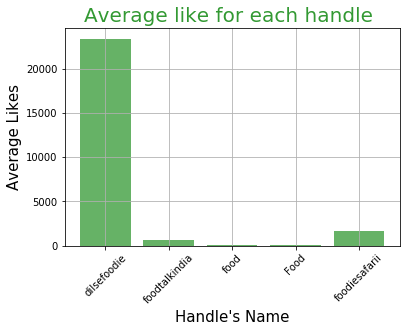

In [99]:
username = list(average_likes_dict.keys())
avg_like = list(average_likes_dict.values())

plt.bar(username,avg_like,color='g',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.xticks(rotation = 45)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()